In [20]:
# Data Preparation:
import pandas as pd

# Load the dataset
netflix = pd.read_csv(r"C:\Users\HP\Downloads\netflix.csv")

netflix

,Unnamed: 0,title,rating,ratingLevel,ratingDescription,release year,user rating score,user rating size
0,0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",80,2004,82.0,80
1,1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",100,2006,NaN,82
2,2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,98.0,80
3,3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2008,98.0,80
4,4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,70,2014,94.0,80
...,...,...,...,...,...,...,...,...
995,995,The BFG,PG,"for action/peril, some scary moments and brief...",60,2016,97.0,80
996,996,The Secret Life of Pets,PG,for action and some rude humor,60,2016,NaN,81
997,997,Precious Puppies,TV-G,Suitable for all ages.,35,2003,NaN,82
998,998,Beary Tales,TV-G,Suitable for all ages.,35,2013,NaN,82


In [29]:
# Rename columns for consistency and easier access
netflix.rename(columns={
    'no.': 's/n',
    'ratingLevel': 'rating_level',
    'ratingDescription': 'rating_description',
    'release year': 'release_year',
    'user rating score': 'user_rating_score',
    'user rating size': 'user_rating_size'
}, inplace=True)


In [30]:
# Display the dataset columns to verify changes
print(netflix.columns)

Index(['s/n', 'title', 'rating', 'rating_level', 'rating_description',
       'release_year', 'user_rating_score', 'user_rating_size'],
      dtype='object')


In [31]:
# Drop rows with missing 'release_year' values
netflix = netflix.dropna(subset=['release_year'])

# Convert 'release_year' to integer
netflix['release_year'] = netflix['release_year'].astype(int)


In [35]:
# Handle missing values in user ratings by filling with a placeholder (e.g., -1)
netflix['user_rating_score'] = netflix['user_rating_score'].fillna(-1)
netflix['user_rating_size'] = netflix['user_rating_size'].fillna(-1)

# Display the cleaned data
print(netflix.head())


   s/n                  title rating  \
0    0           White Chicks  PG-13   
1    1    Lucky Number Slevin      R   
2    2         Grey's Anatomy  TV-14   
3    3           Prison Break  TV-14   
4    4  How I Met Your Mother  TV-PG   

                                        rating_level  rating_description  \
0  crude and sexual humor, language and some drug...                  80   
1  strong violence, sexual content and adult lang...                 100   
2  Parents strongly cautioned. May be unsuitable ...                  90   
3  Parents strongly cautioned. May be unsuitable ...                  90   
4  Parental guidance suggested. May not be suitab...                  70   

   release_year  user_rating_score  user_rating_size  
0          2004               82.0                80  
1          2006               -1.0                82  
2          2016               98.0                80  
3          2008               98.0                80  
4          2014            

In [36]:
# Analyze Trends in Ratings Over Different Years

# Group by release year and rating to count the number of titles in each rating category per year
rating_trends = netflix.groupby(['release_year', 'rating']).size().reset_index(name='count')

# Display the rating trends data
print(rating_trends.head())


   release_year rating  count
0          1940      G      3
1          1976      G      4
2          1978     PG      2
3          1982      G      3
4          1982     PG      3


In [37]:
# Analyze Trends in User Ratings Over Different Years

# Group by release year to calculate the average user rating score per year
user_rating_trends = netflix.groupby('release_year')['user_rating_score'].mean().reset_index()

# Display the user rating trends data
print(user_rating_trends.head())


   release_year  user_rating_score
0          1940               61.0
1          1976               -1.0
2          1978               86.0
3          1982               33.5
4          1986               67.0


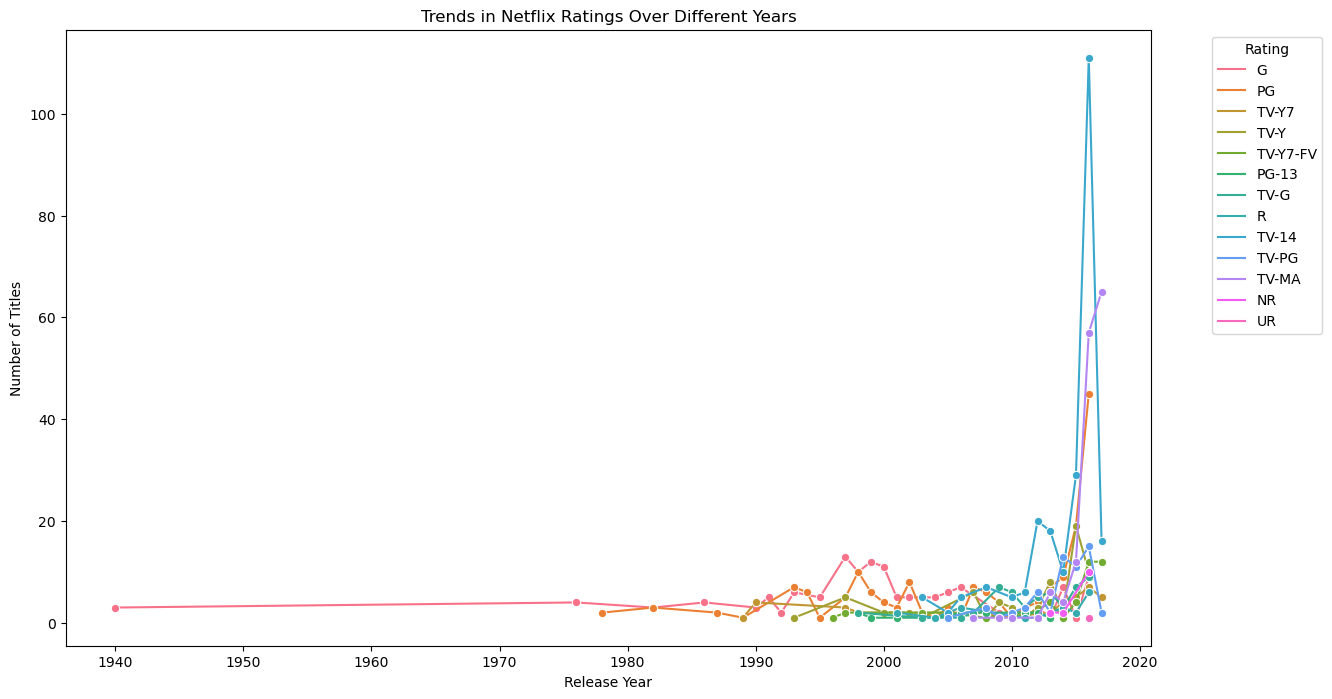

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the Data Using Seaborn

# Set the plot size for better readability
plt.figure(figsize=(14, 8))

# Use Seaborn to create a line plot for rating trends over years
sns.lineplot(data=rating_trends, x='release_year', y='count', hue='rating', marker='o')

# Add plot title and labels
plt.title('Trends in Netflix Ratings Over Different Years')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.show()


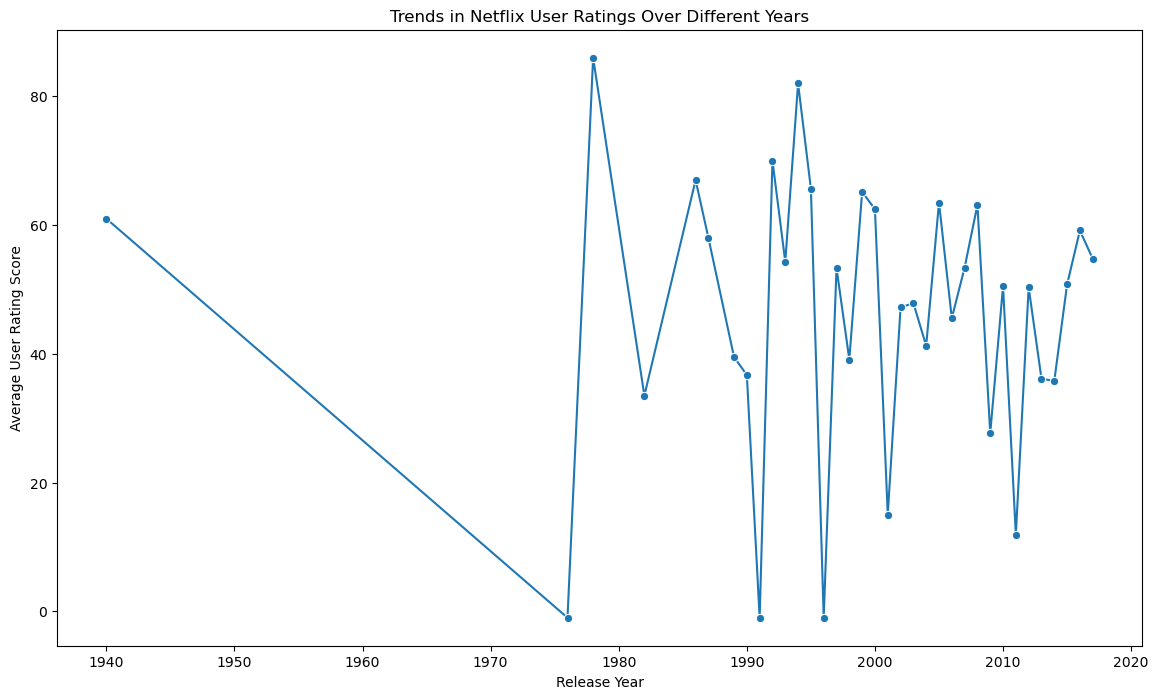

In [40]:
# Set the plot size for better readability
plt.figure(figsize=(14, 8))

# Use Seaborn to create a line plot for average user rating score over years
sns.lineplot(data=user_rating_trends, x='release_year', y='user_rating_score', marker='o')

# Add plot title and labels
plt.title('Trends in Netflix User Ratings Over Different Years')
plt.xlabel('Release Year')
plt.ylabel('Average User Rating Score')

# Display the plot
plt.show()